In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from pathlib import Path

# check if workding_dir is in local variables
if "workding_dir" not in locals():
    workding_dir = str(Path.cwd().parent)

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/papers/rapget-translation


In [3]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/papers/rapget-translation/.env


True

In [4]:
import os

model_name = os.getenv("MODEL_NAME")
adapter_name_or_path = os.getenv("ADAPTER_NAME_OR_PATH")
load_in_4bit = os.getenv("LOAD_IN_4BIT") == "true"
data_path = os.getenv("DATA_PATH")
results_path = "results/mac-results_few_shots.csv"  # os.getenv("RESULTS_PATH")
use_english_datasets = os.getenv("USE_ENGLISH_DATASETS") == "true"
max_new_tokens = int(os.getenv("MAX_NEW_TOKENS", 2048))

print(model_name, adapter_name_or_path, load_in_4bit, data_path, results_path, use_english_datasets, max_new_tokens)

01-ai/Yi-1.5-9B-Chat None False datasets/mac/mac.tsv results/mac-results_few_shots.csv False 300


In [5]:
import pandas as pd
from llm_toolkit.llm_utils import *
from llm_toolkit.translation_utils import *

df = pd.read_csv(results_path)
df.info()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/inflaton/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


loading: /Users/inflaton/code/engd/papers/rapget-translation/eval_modules/calc_repetitions.py
loading /Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/inflaton/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   chinese                                1133 non-null   object
 1   english                                1133 non-null   object
 2   Qwen/Qwen2-72B-Instruct/shots-00       1133 non-null   object
 3   Qwen/Qwen2-72B-Instruct/shots-01       1133 non-null   object
 4   Qwen/Qwen2-72B-Instruct/shots-03       1133 non-null   object
 5   Qwen/Qwen2-72B-Instruct/shots-05       1133 non-null   object
 6   Qwen/Qwen2-72B-Instruct/shots-10       1133 non-null   object
 7   internlm/internlm2_5-7b-chat/shots-00  1133 non-null   object
 8   internlm/internlm2_5-7b-chat/shots-01  1133 non-null   object
 9   internlm/internlm2_5-7b-chat/shots-03  1133 non-null   object
 10  internlm/internlm2_5-7b-chat/shots-05  1133 non-null   object
 11  internlm/internlm

In [6]:
df_openai = pd.read_csv("results/mac-results_few_shots_openai.csv")
df_openai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   chinese               1133 non-null   object
 1   english               1133 non-null   object
 2   gpt-4o-mini/shots-00  1133 non-null   object
 3   gpt-4o-mini/shots-01  1133 non-null   object
 4   gpt-4o-mini/shots-03  1133 non-null   object
 5   gpt-4o-mini/shots-05  1133 non-null   object
 6   gpt-4o-mini/shots-10  1133 non-null   object
 7   gpt-4o-mini/shots-50  1133 non-null   object
 8   gpt-4o/shots-00       1133 non-null   object
 9   gpt-4o/shots-01       1133 non-null   object
 10  gpt-4o/shots-03       1133 non-null   object
 11  gpt-4o/shots-05       1133 non-null   object
 12  gpt-4o/shots-10       1133 non-null   object
 13  gpt-4o/shots-50       1133 non-null   object
dtypes: object(14)
memory usage: 124.1+ KB


In [7]:
openai_cols = df_openai.columns[2:].tolist()
openai_cols

['gpt-4o-mini/shots-00',
 'gpt-4o-mini/shots-01',
 'gpt-4o-mini/shots-03',
 'gpt-4o-mini/shots-05',
 'gpt-4o-mini/shots-10',
 'gpt-4o-mini/shots-50',
 'gpt-4o/shots-00',
 'gpt-4o/shots-01',
 'gpt-4o/shots-03',
 'gpt-4o/shots-05',
 'gpt-4o/shots-10',
 'gpt-4o/shots-50']

In [8]:
result_columns = df.columns[2:].to_list()
result_columns.sort()
result_columns

['Qwen/Qwen2-72B-Instruct/shots-00',
 'Qwen/Qwen2-72B-Instruct/shots-01',
 'Qwen/Qwen2-72B-Instruct/shots-03',
 'Qwen/Qwen2-72B-Instruct/shots-05',
 'Qwen/Qwen2-72B-Instruct/shots-10',
 'Qwen/Qwen2-7B-Instruct/shots-00',
 'Qwen/Qwen2-7B-Instruct/shots-01',
 'Qwen/Qwen2-7B-Instruct/shots-03',
 'Qwen/Qwen2-7B-Instruct/shots-05',
 'Qwen/Qwen2-7B-Instruct/shots-10',
 'internlm/internlm2_5-7b-chat/shots-00',
 'internlm/internlm2_5-7b-chat/shots-01',
 'internlm/internlm2_5-7b-chat/shots-03',
 'internlm/internlm2_5-7b-chat/shots-05',
 'internlm/internlm2_5-7b-chat/shots-10',
 'internlm/internlm2_5-7b-chat/shots-50']

In [9]:
columns = df.columns[:2].to_list() + result_columns
df = df[columns]
df[openai_cols] = df_openai[openai_cols]
columns = df.columns.to_list()
result_columns = df.columns[2:].to_list()
result_columns, columns

(['Qwen/Qwen2-72B-Instruct/shots-00',
  'Qwen/Qwen2-72B-Instruct/shots-01',
  'Qwen/Qwen2-72B-Instruct/shots-03',
  'Qwen/Qwen2-72B-Instruct/shots-05',
  'Qwen/Qwen2-72B-Instruct/shots-10',
  'Qwen/Qwen2-7B-Instruct/shots-00',
  'Qwen/Qwen2-7B-Instruct/shots-01',
  'Qwen/Qwen2-7B-Instruct/shots-03',
  'Qwen/Qwen2-7B-Instruct/shots-05',
  'Qwen/Qwen2-7B-Instruct/shots-10',
  'internlm/internlm2_5-7b-chat/shots-00',
  'internlm/internlm2_5-7b-chat/shots-01',
  'internlm/internlm2_5-7b-chat/shots-03',
  'internlm/internlm2_5-7b-chat/shots-05',
  'internlm/internlm2_5-7b-chat/shots-10',
  'internlm/internlm2_5-7b-chat/shots-50',
  'gpt-4o-mini/shots-00',
  'gpt-4o-mini/shots-01',
  'gpt-4o-mini/shots-03',
  'gpt-4o-mini/shots-05',
  'gpt-4o-mini/shots-10',
  'gpt-4o-mini/shots-50',
  'gpt-4o/shots-00',
  'gpt-4o/shots-01',
  'gpt-4o/shots-03',
  'gpt-4o/shots-05',
  'gpt-4o/shots-10',
  'gpt-4o/shots-50'],
 ['chinese',
  'english',
  'Qwen/Qwen2-72B-Instruct/shots-00',
  'Qwen/Qwen2-72B-In

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   chinese                                1133 non-null   object
 1   english                                1133 non-null   object
 2   Qwen/Qwen2-72B-Instruct/shots-00       1133 non-null   object
 3   Qwen/Qwen2-72B-Instruct/shots-01       1133 non-null   object
 4   Qwen/Qwen2-72B-Instruct/shots-03       1133 non-null   object
 5   Qwen/Qwen2-72B-Instruct/shots-05       1133 non-null   object
 6   Qwen/Qwen2-72B-Instruct/shots-10       1133 non-null   object
 7   Qwen/Qwen2-7B-Instruct/shots-00        1133 non-null   object
 8   Qwen/Qwen2-7B-Instruct/shots-01        1133 non-null   object
 9   Qwen/Qwen2-7B-Instruct/shots-03        1133 non-null   object
 10  Qwen/Qwen2-7B-Instruct/shots-05        1133 non-null   object
 11  Qwen/Qwen2-7B-Ins

In [11]:
metrics_df = get_metrics(df, max_output_tokens=max_new_tokens, variant="shots")
metrics_df["shots"] = metrics_df["shots"].apply(lambda x: int(x))
metrics_df

Qwen/Qwen2-72B-Instruct/shots-00: {'meteor': 0.4003638205699929, 'bleu_scores': {'bleu': 0.12223832517678616, 'precisions': [0.4121705826924831, 0.16076937606245673, 0.07965006202258929, 0.04230221679886109], 'brevity_penalty': 1.0, 'length_ratio': 1.0897316992381583, 'translation_length': 32899, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.44387940456743175, 'rouge2': 0.1961824686696552, 'rougeL': 0.3850228285100058, 'rougeLsum': 0.38485015944385415}, 'accuracy': 0.0, 'correct_ids': []}
Qwen/Qwen2-72B-Instruct/shots-01: {'meteor': 0.4068727655718769, 'bleu_scores': {'bleu': 0.13151008586303575, 'precisions': [0.4338771593090211, 0.17213794934776114, 0.08670460424211071, 0.04619028819581524], 'brevity_penalty': 1.0, 'length_ratio': 1.0354421994037761, 'translation_length': 31260, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4529540392980122, 'rouge2': 0.20367966758100453, 'rougeL': 0.39473841744219135, 'rougeLsum': 0.39483545413485843}, 'accuracy': 0.00176522506

model  shots    meteor    bleu_1   rouge_l  \
0        Qwen/Qwen2-72B-Instruct      0  0.400364  0.122238  0.385023   
1        Qwen/Qwen2-72B-Instruct      1  0.406873  0.131510  0.394738   
2        Qwen/Qwen2-72B-Instruct      3  0.408624  0.137718  0.398227   
3        Qwen/Qwen2-72B-Instruct      5  0.413233  0.143977  0.403855   
4        Qwen/Qwen2-72B-Instruct     10  0.415982  0.144935  0.406755   
5         Qwen/Qwen2-7B-Instruct      0  0.377477  0.117835  0.368038   
6         Qwen/Qwen2-7B-Instruct      1  0.380008  0.117319  0.371752   
7         Qwen/Qwen2-7B-Instruct      3  0.386782  0.123689  0.377960   
8         Qwen/Qwen2-7B-Instruct      5  0.387849  0.122773  0.382715   
9         Qwen/Qwen2-7B-Instruct     10  0.385265  0.125353  0.381922   
10  internlm/internlm2_5-7b-chat      0  0.368168  0.113605  0.360415   
11  internlm/internlm2_5-7b-chat      1  0.371959  0.115771  0.364059   
12  internlm/internlm2_5-7b-chat      3  0.374711  0.115483  0.369094   
13  internlm/internlm2_5-7b-chat      5  0.372856  0.115415  0.368901   
14  internlm/internlm2_5-7b-chat     10  0.375090  0.116965  0.368089   
15  internlm/internlm2_5-7b-chat     50  0.372131  0.114047  0.362647   
16                   gpt-4o-mini      0  0.379770  0.120824  0.370576   
17                   gpt-4o-mini      1  0.377214  0.120134  0.367480   
18                   gpt-4o-mini      3  0.377299  0.124003  0.368280   
19                   gpt-4o-mini      5  0.355418  0.120246  0.347203   
20                   gpt-4o-mini     10  0.373360  0.125760  0.365902   
21                   gpt-4o-mini     50  0.404469  0.139729  0.391665   
22                        gpt-4o      0  0.379742  0.120546  0.370411   
23                        gpt-4o      1  0.375886  0.120499  0.365890   
24                        gpt-4o      3  0.376851  0.124087  0.366900   
25                        gpt-4o      5  0.357725  0.121697  0.348381   
26                        gpt-4o     10  0.374644  0.124982  0.367125   
27                        gpt-4o     50  0.404139  0.137825  0.390956   

    ews_score  repetition_score  total_repetitions       rap  \
0         0.0          0.195940           0.195940  0.397018   
1         0.0          0.157988           0.157988  0.404122   
2         0.0          0.127096           0.127096  0.406395   
3         0.0          0.119153           0.119153  0.411118   
4         0.0          0.096205           0.096205  0.414259   
5         0.0          0.071492           0.071492  0.376313   
6         0.0          0.074139           0.074139  0.378792   
7         0.0          0.141218           0.141218  0.384441   
8         0.0          0.091792           0.091792  0.386316   
9         0.0          0.103266           0.103266  0.383554   
10        0.0          0.214475           0.214475  0.364806   
11        0.0          0.140335           0.140335  0.369721   
12        0.0          0.177405           0.177405  0.371871   
13        0.0          0.148279           0.148279  0.370487   
14        0.0          0.130627           0.130627  0.372987   
15        0.0          0.168579           0.168579  0.369448   
16        0.0          0.095322           0.095322  0.378211   
17        0.0          0.091792           0.091792  0.375723   
18        0.0          0.091792           0.091792  0.375807   
19        0.0          0.050309           0.050309  0.354645   
20        0.0          0.070609           0.070609  0.372222   
21        0.0          0.084731           0.084731  0.402992   
22        0.0          0.095322           0.095322  0.378184   
23        0.0          0.091792           0.091792  0.374400   
24        0.0          0.093557           0.093557  0.375333   
25        0.0          0.035305           0.035305  0.357179   
26        0.0          0.070609           0.070609  0.373503   
27        0.0          0.075905           0.075905  0.402816   

    num_max_output_tokens  
0                       

In [41]:
time_df = load_eval_times("logs")
time_df

Loading content of logs/l40-1gpu.txt
Loading content of logs/l40-4gpu.txt
Error processing log file: logs/l40-4gpu.txt
'utf-8' codec can't decode bytes in position 0-1: unexpected end of data
Loading content of logs/openai-gpt-4o-mini.txt
Loading content of logs/openai-gpt-4o.txt


model  shots   eval_time
0   internlm/internlm2_5-7b-chat      0   23.116667
1   internlm/internlm2_5-7b-chat      1   24.783333
2   internlm/internlm2_5-7b-chat      3   35.083333
3   internlm/internlm2_5-7b-chat      5   54.016667
4   internlm/internlm2_5-7b-chat     10  108.066667
5   internlm/internlm2_5-7b-chat     50  798.616667
6         Qwen/Qwen2-7B-Instruct      0   18.516667
7         Qwen/Qwen2-7B-Instruct      1   19.883333
8         Qwen/Qwen2-7B-Instruct      3   30.233333
9         Qwen/Qwen2-7B-Instruct      5   43.233333
10        Qwen/Qwen2-7B-Instruct     10   75.650000
11       Qwen/Qwen2-72B-Instruct      0  167.966667
12       Qwen/Qwen2-72B-Instruct      1  169.633333
13       Qwen/Qwen2-72B-Instruct      3  220.133333
14       Qwen/Qwen2-72B-Instruct      5  324.183333
15       Qwen/Qwen2-72B-Instruct     10  561.366667
16                   gpt-4o-mini      0   30.100000
17                   gpt-4o-mini      1   29.583333
18                   gpt-4o-mini      3   24.300000
19                   gpt-4o-mini      5   22.733333
20                   gpt-4o-mini     10   22.433333
21                   gpt-4o-mini     50   24.350000
22                        gpt-4o      0   28.866667
23                        gpt-4o      1   22.733333
24                        gpt-4o      3   38.750000
25                        gpt-4o      5   31.800000
26                        gpt-4o     10   33.800000
27                        gpt-4o     50   38.250000

In [42]:
# Merge time_df into metrics_df
metrics_df.drop(columns=["eval_time"], inplace=True, errors="ignore")
metrics_df = pd.merge(metrics_df, time_df, on=["model", "shots"], how="left")
metrics_df

model  shots    meteor    bleu_1   rouge_l  \
0        Qwen/Qwen2-72B-Instruct      0  0.400364  0.122238  0.385023   
1        Qwen/Qwen2-72B-Instruct      1  0.406873  0.131510  0.394738   
2        Qwen/Qwen2-72B-Instruct      3  0.408624  0.137718  0.398227   
3        Qwen/Qwen2-72B-Instruct      5  0.413233  0.143977  0.403855   
4        Qwen/Qwen2-72B-Instruct     10  0.415982  0.144935  0.406755   
5         Qwen/Qwen2-7B-Instruct      0  0.377477  0.117835  0.368038   
6         Qwen/Qwen2-7B-Instruct      1  0.380008  0.117319  0.371752   
7         Qwen/Qwen2-7B-Instruct      3  0.386782  0.123689  0.377960   
8         Qwen/Qwen2-7B-Instruct      5  0.387849  0.122773  0.382715   
9         Qwen/Qwen2-7B-Instruct     10  0.385265  0.125353  0.381922   
10  internlm/internlm2_5-7b-chat      0  0.368168  0.113605  0.360415   
11  internlm/internlm2_5-7b-chat      1  0.371959  0.115771  0.364059   
12  internlm/internlm2_5-7b-chat      3  0.374711  0.115483  0.369094   
13  internlm/internlm2_5-7b-chat      5  0.372856  0.115415  0.368901   
14  internlm/internlm2_5-7b-chat     10  0.375090  0.116965  0.368089   
15  internlm/internlm2_5-7b-chat     50  0.372131  0.114047  0.362647   
16                   gpt-4o-mini      0  0.379770  0.120824  0.370576   
17                   gpt-4o-mini      1  0.377214  0.120134  0.367480   
18                   gpt-4o-mini      3  0.377299  0.124003  0.368280   
19                   gpt-4o-mini      5  0.355418  0.120246  0.347203   
20                   gpt-4o-mini     10  0.373360  0.125760  0.365902   
21                   gpt-4o-mini     50  0.404469  0.139729  0.391665   
22                        gpt-4o      0  0.379742  0.120546  0.370411   
23                        gpt-4o      1  0.375886  0.120499  0.365890   
24                        gpt-4o      3  0.376851  0.124087  0.366900   
25                        gpt-4o      5  0.357725  0.121697  0.348381   
26                        gpt-4o     10  0.374644  0.124982  0.367125   
27                        gpt-4o     50  0.404139  0.137825  0.390956   

    ews_score  repetition_score  total_repetitions       rap  \
0         0.0          0.195940           0.195940  0.397018   
1         0.0          0.157988           0.157988  0.404122   
2         0.0          0.127096           0.127096  0.406395   
3         0.0          0.119153           0.119153  0.411118   
4         0.0          0.096205           0.096205  0.414259   
5         0.0          0.071492           0.071492  0.376313   
6         0.0          0.074139           0.074139  0.378792   
7         0.0          0.141218           0.141218  0.384441   
8         0.0          0.091792           0.091792  0.386316   
9         0.0          0.103266           0.103266  0.383554   
10        0.0          0.214475           0.214475  0.364806   
11        0.0          0.140335           0.140335  0.369721   
12        0.0          0.177405           0.177405  0.371871   
13        0.0          0.148279           0.148279  0.370487   
14        0.0          0.130627           0.130627  0.372987   
15        0.0          0.168579           0.168579  0.369448   
16        0.0          0.095322           0.095322  0.378211   
17        0.0          0.091792           0.091792  0.375723   
18        0.0          0.091792           0.091792  0.375807   
19        0.0          0.050309           0.050309  0.354645   
20        0.0          0.070609           0.070609  0.372222   
21        0.0          0.084731           0.084731  0.402992   
22        0.0          0.095322           0.095322  0.378184   
23        0.0          0.091792           0.091792  0.374400   
24        0.0          0.093557           0.093557  0.375333   
25        0.0          0.035305           0.035305  0.357179   
26        0.0          0.070609           0.070609  0.373503   
27        0.0          0.075905           0.075905  0.402816   

    num_max_output_tokens   eval_time  
0           

In [43]:
models = metrics_df["model"].unique()
models

array(['Qwen/Qwen2-72B-Instruct', 'Qwen/Qwen2-7B-Instruct',
       'internlm/internlm2_5-7b-chat', 'gpt-4o-mini', 'gpt-4o'],
      dtype=object)

In [44]:
# list of markers for plotting
markers = ["o", "x", "^", "s", "d", "P", "X", "*", "v", ">", "<", "p", "h", "H", "+", "|", "_"]
markers = {model: marker for model, marker in zip(models, markers)}

In [54]:
model_orders = {
    "Qwen/Qwen2-72B-Instruct": 10,
    "Qwen/Qwen2-7B-Instruct": 20,
    "internlm/internlm2_5-7b-chat": 30,
    "gpt-4o-mini": 99,
    "gpt-4o": 100,
}

In [57]:
# plot mtr vs rpp
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


def plot_metrics_vs_shots(metrics_df, models, markers, columns, titles, log_scales=[False, False], sync_y_axis=False):
    fig, ax = plt.subplots(figsize=(10, 6))
    # set grid
    ax.grid(True)
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.grid(which="major", linestyle="-", linewidth="0.5", color="red")
    # ax.grid(which="minor", linestyle=":", linewidth="0.5", color="black")

    # Create a mapping from original x-values to new, evenly spaced x-values
    original_x_values = sorted(metrics_df["shots"].unique())
    new_x_values = range(len(original_x_values))
    x_mapping = dict(zip(original_x_values, new_x_values))

    twin = ax.twinx()

    for model in models:
        model_df = metrics_df[metrics_df["model"] == model]
        transformed_x = [x_mapping[x] for x in model_df["shots"]]
        for i, column in enumerate(columns):
            current_ax =  twin if i > 0 else ax
            current_ax.plot(
                transformed_x,
                model_df[column],
                label=model + (f" ({titles[i]})" if titles else ""),
                marker=markers[model],
                linestyle="--" if i > 0 else "-",
            )
            current_ax.set_ylabel(titles[i])
            if log_scales[i]:
                current_ax.set_yscale("log")

    if sync_y_axis:
        # Synchronize the y-axis limits
        ax.set_ylim(
            min(ax.get_ylim()[0], twin.get_ylim()[0]),
            max(ax.get_ylim()[1], twin.get_ylim()[1]),
        )
        twin.set_ylim(ax.get_ylim())

    # Set the x-axis ticks to be evenly spaced
    ax.xaxis.set_major_locator(ticker.FixedLocator(new_x_values))

    # Set custom labels for the ticks
    ax.xaxis.set_major_formatter(ticker.FixedFormatter(original_x_values))

    # ax.set_ylim(0, 1)
    ax.set_xlabel("Number of Shots")
    # Collect handles and labels from both axes
    handles, labels = ax.get_legend_handles_labels()
    handles_twin, labels_twin = twin.get_legend_handles_labels()
    handles += handles_twin
    labels += labels_twin

    # Sort the handles and labels by labels
    sorted_handles_labels = sorted(zip(labels, handles), key=lambda x: model_orders[x[0].split(" ")[0]])
    sorted_labels, sorted_handles = zip(*sorted_handles_labels)

    # Create a combined legend
    ax.legend(
        sorted_handles,
        sorted_labels,
        loc="lower center",
        bbox_to_anchor=(0.5, -0.6 if len(columns) > 1 else -0.4),
    )

    plt.show()

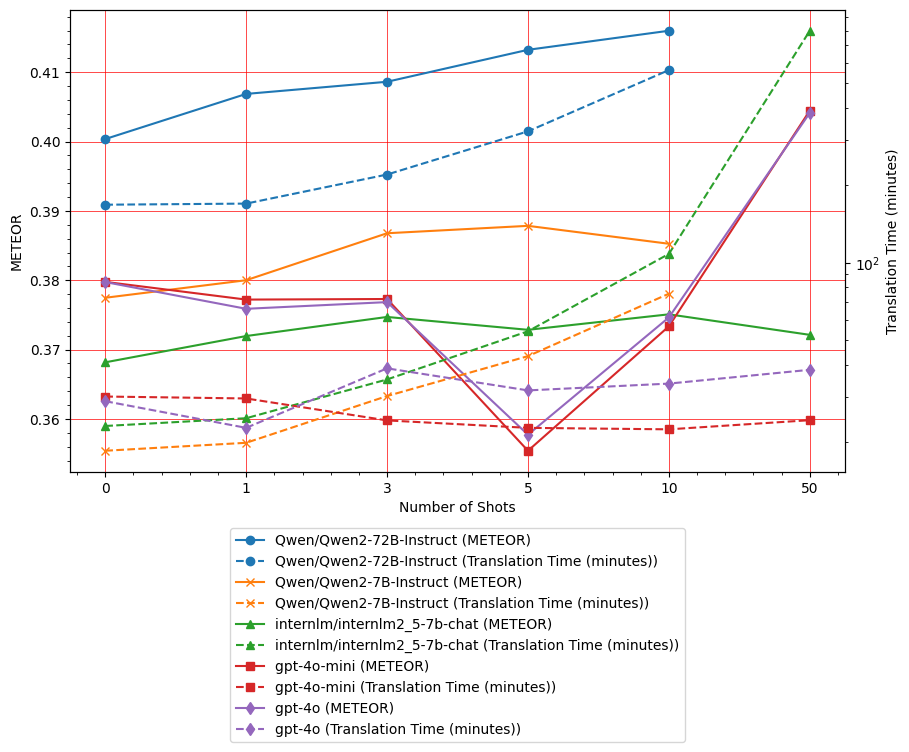

In [58]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["meteor", "eval_time"],
    ["METEOR", "Translation Time (minutes)"],
    [False, True]
)

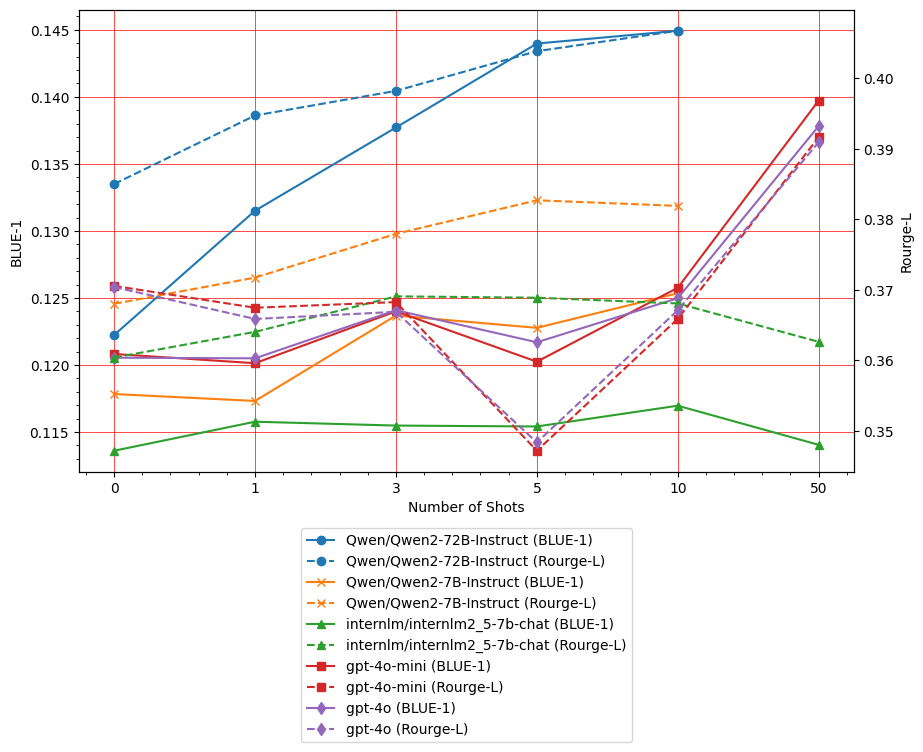

In [59]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["bleu_1", "rouge_l"],
    ["BLUE-1", "Rourge-L"],
)

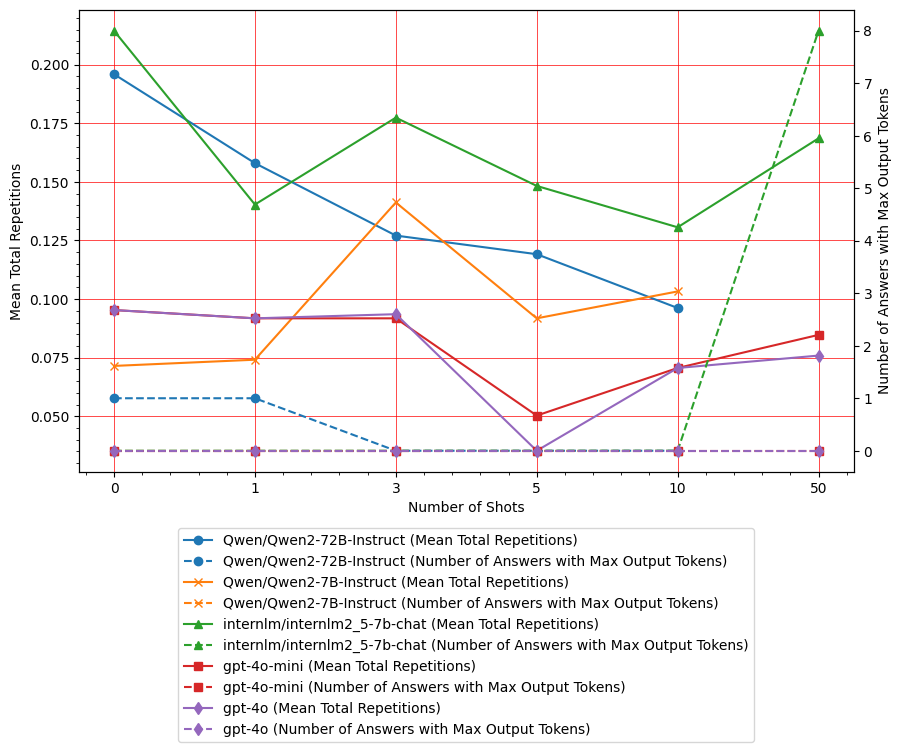

In [60]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["total_repetitions", "num_max_output_tokens"],
    ["Mean Total Repetitions", "Number of Answers with Max Output Tokens"],
)

In [61]:
for col in result_columns:
    print(f"### Analyzing: {col}")
    analyze_translation_results(df, col, repetition_threshold=50)

### Analyzing: Qwen/Qwen2-72B-Instruct/shots-00
*** Found 0 rows with total_repetitions > 50 for Qwen/Qwen2-72B-Instruct/shots-00

*** Found 1 rows with output_tokens >= 300 for Qwen/Qwen2-72B-Instruct/shots-00
--------------------------------------------------
chinese: 话都说得有些不搭调，可也是借酒吐真言，放了平时则是难出口的。
--------------------------------------------------
english: Her words were inappropriate to the occasion; obviously, alcohol was bringing out some hidden truths.
--------------------------------------------------
Qwen/Qwen2-72B-Instruct/shots-00: Though his words were somewhat incoherent, he was speaking the truth by借助the aid of alcohol, which would be hard to utter under normal circumstances. 

Note: "借酒吐真言" is a Chinese idiom that means "to speak the truth with the aid of alcohol". However, since the instruction is not to provide additional sentences, I have included the translation of the idiom in brackets. If you prefer not to have this, the sentence would be: 

Though his words were s

In [62]:
metrics_df.to_csv(results_path.replace(".csv", "_metrics.csv"), index=False)

In [63]:
metrics_df.describe()

shots     meteor     bleu_1    rouge_l  ews_score  repetition_score  \
count  28.00000  28.000000  28.000000  28.000000       28.0         28.000000   
mean    8.75000   0.383353   0.124249   0.374463        0.0          0.110894   
std    14.94589   0.016042   0.008926   0.015021        0.0          0.043799   
min     0.00000   0.355418   0.113605   0.347203        0.0          0.035305   
25%     1.00000   0.374323   0.117706   0.366650        0.0          0.082524   
50%     3.00000   0.377388   0.121968   0.368997        0.0          0.095322   
75%    10.00000   0.390977   0.125454   0.383292        0.0          0.140556   
max    50.00000   0.415982   0.144935   0.406755        0.0          0.214475   

       total_repetitions        rap  num_max_output_tokens   eval_time  
count          28.000000  28.000000              28.000000   28.000000  
mean            0.110894   0.381524               0.357143  107.935119  
std             0.043799   0.015867               1.520582  179.911108  
min             0.035305   0.354645               0.000000   18.516667  
25%             0.082524   0.372134               0.000000   24.337500  
50%             0.095322   0.376060               0.000000   32.800000  
75%             0.140556   0.388991               0.000000   83.754167  
max             0.214475   0.414259               8.000000  798.616667